# Visualisierung des Leverage Effekts

In diesem Arbeitsblatt geht es darum zu zeigen, wie stark der Leverage
Effekt die Rendite des Eigenkapitals beeinflusst und wie wichtig die
Prognose der Entwicklung des Zinsniveaus ist.

Um die Auswirkung des Leverage Effekts im Allgemeinen zu zeigen, ist die Eigenkapitalrentabilität ($\frac{\text{Gewinn}}{\text{EK}}\times 100$) in Abhängigkeit von der Gesamtkapitalrentabilität ($\frac{\text{EBIT}}{\text{GK}}\times 100$) und des Finanzierungsverhältnisses ($\frac{\text{FK}}{\text{EK}}$) Darzustellen.

Um dies zu Bewerkstelligen ist das CSV 
<a
href="https://raw.githubusercontent.com/SkriptenMk/WR_I_24-27/refs/heads/main/docs/bwl/finanzierung/260112_data.csv"
download="260112_data.csv">
`260112_data.csv`
</a> als Pandas DataFrame in dieses
Jupyter Notebook zu lesen. Der so erstellte DataFrame ist um die Spalten
`RoI`, Fremdkapitalzinssatz `FKZS`, `Gewinn` und `RoE` zu ergänzen.
Dabei kann der RoI konstant auf 7.5% gesetzt werden. Für den
Fremdkapitalzinssatz und die davon abhängigen Grössen sind Varianten für
5% und für 10% zu berechnen.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('260112_data.csv', sep=';')
df['RoI'] = 7.5
df['FKZS5'] = 5
df['FKZS10'] = 10
df['FKZ5'] = df['FK'] * (df['FKZS5'] / 100)
df['Gewinn5'] = df['RoI'] - df['FKZ5']
df['RoE5'] = df['Gewinn5'] / df['EK'] * 100
df['FKZ10'] = df['FK'] * (df['FKZS10'] / 100)
df['Gewinn10'] = df['RoI'] - df['FKZ10']
df['RoE10'] = df['Gewinn10'] / df['EK'] * 100
df

,GK,EK,FK,RoI,FKZS5,FKZS10,FKZ5,Gewinn5,RoE5,FKZ10,Gewinn10,RoE10
0,100,1,99,7.5,5,10,4.95,2.55,255.000000,9.9,-2.4,-240.000000
1,100,10,90,7.5,5,10,4.50,3.00,30.000000,9.0,-1.5,-15.000000
2,100,20,80,7.5,5,10,4.00,3.50,17.500000,8.0,-0.5,-2.500000
3,100,30,70,7.5,5,10,3.50,4.00,13.333333,7.0,0.5,1.666667
4,100,40,60,7.5,5,10,3.00,4.50,11.250000,6.0,1.5,3.750000
5,100,50,50,7.5,5,10,2.50,5.00,10.000000,5.0,2.5,5.000000
6,100,60,40,7.5,5,10,2.00,5.50,9.166667,4.0,3.5,5.833333
7,100,70,30,7.5,5,10,1.50,6.00,8.571429,3.0,4.5,6.428571
8,100,80,20,7.5,5,10,1.00,6.50,8.125000,2.0,5.5,6.875000
9,100,90,10,7.5,5,10,0.50,7.00,7.777778,1.0,6.5,7.222222


Der Datensatz ist in zwei Grafiken "Entwicklung des RoE bei 5% Zins" und "Entwicklung des RoE bei 10% Zins" zu visualisieren.

Text(0.5, 0, 'FK')

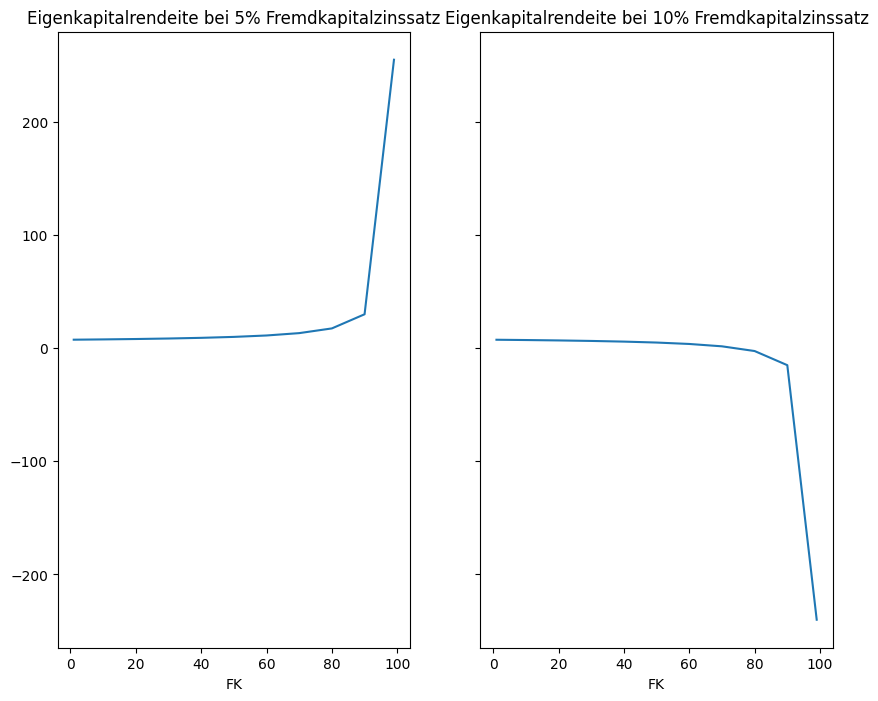

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, 
                               figsize=(10, 8), sharey=True)

ax1.plot(df['FK'], df['RoE5'])
ax1.set_title('Eigenkapitalrendeite bei 5% Fremdkapitalzinssatz')
ax1.set_xlabel('FK')

ax2.plot(df['FK'], df['RoE10'])
ax2.set_title('Eigenkapitalrendeite bei 10% Fremdkapitalzinssatz')
ax2.set_xlabel('FK')

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Subplots erstellen (analog zu plt.subplots)
# shared_yaxes=True entspricht sharey=True
fig = make_subplots(
    rows=1, cols=2, 
    shared_yaxes=True,
    subplot_titles=('Eigenkapitalrendite bei 5% Fremdkapitalzinssatz', 
                    'Eigenkapitalrendite bei 10% Fremdkapitalzinssatz')
)

# 2. Erste Linie hinzufügen (analog zu ax1.plot)
fig.add_trace(
    go.Scatter(x=df['FK'], y=df['RoE5'], mode='lines', name='RoE 5%'),
    row=1, col=1
)

# 3. Zweite Linie hinzufügen (analog zu ax2.plot)
fig.add_trace(
    go.Scatter(x=df['FK'], y=df['RoE10'], mode='lines', name='RoE 10%'),
    row=1, col=2
)

# 4. Achsenbeschriftungen setzen (analog zu set_xlabel)
fig.update_xaxes(title_text="FK", row=1, col=1)
fig.update_xaxes(title_text="FK", row=1, col=2)

# 5. Layout anpassen (Größe und Titel)
# Plotly nutzt Pixel statt Inches. 10x8 inch sind ca. 1000x800 pixel.
fig.update_layout(
    width=1000, 
    height=800,
    showlegend=False  # Matplotlib zeigt standardmäßig keine Legende ohne Aufruf
)

fig.show()

Basierend auf der Datenauswerung ist zu klären, wie gross der Schätzfehler für die durchschnittliche Verzinsung des Fremdkapitals sein darf.